In [1]:
import numpy as np
import os
CurrentPath = os.getcwd()
data_1 = np.loadtxt(CurrentPath + '/2025/data_1.txt', delimiter=' ')
X = data_1.T[0];Y = data_1.T[1]; var = data_1.T[2]

Metropolis-Hastings algorithm: 
1. Propose a prior

In [2]:
# 0 < a < 1, sigma_a = 0.0005
# -2.6 < b < -2.4, sigma_b = 0.1
# 6.7 < c < 6.9, sigma_c = 0.1
# 16 < d < 18 sigma_d = 1
from numpy import random
a_init = random.uniform(0,1)
b_init = random.uniform(-2.6,  -2.4)
c_init = random.uniform(6.7, 6.9)
d_init = random.uniform(16, 18)



2. calculate the likelihood = chisq

In [3]:
def cube(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

def chisq(x0,y0,var,a,b,c,d):
    diff = (y0 - cube(x0,a,b,c,d))**2
    chisq = np.sum(diff/var)
    return chisq


3. Create a markov chain

In [4]:
from tqdm import tqdm

def Markov(paramk,paramkp1,x,y,var):
    minuschisqk = -chisq(x,y,var,paramk[0],paramk[1],paramk[2],paramk[3])/2
    minuschisqkp1 = -chisq(x,y,var,paramkp1[0],paramkp1[1],paramkp1[2],paramkp1[3])/2
    lnr = np.log(np.random.uniform(0.,1.))

    if minuschisqkp1 - minuschisqk > lnr:
#        print(f"param0 = {paramk}, paramkp1 = {paramkp1}, \n chisq0 = {minuschisqk}, chisqkp1 = {minuschisqkp1}, lnr = {lnr}, moved : True")
        return paramkp1, minuschisqkp1
    else:
#        print(f"param0 = {paramk}, paramkp1 = {paramkp1}, \n chisq0 = {minuschisqk}, chisqkp1 = {minuschisqkp1}, lnr = {lnr}, moved : False")
        return paramk, minuschisqk  
# 0 < a < 1, sigma_a = 0.005
# -2.6 < b < -2.4, sigma_b = 0.1
# 6.7 < c < 6.9, sigma_c = 0.1
# 16 < d < 18 sigma_d = 1
def MCMC(paraminit, nstep,normal_vec,x,y,var):
    param0 = paraminit
    arr = np.zeros((len(param0) + 1,nstep))
    for k in tqdm(range(nstep)):
        paramkp1 = np.array([param0[0] + random.normal(0,normal_vec[0]), param0[1]+ random.normal(0,normal_vec[1]),
                              param0[2]+random.normal(0,normal_vec[2]), param0[3]+random.normal(0,normal_vec[3])]) # step size
        param0, loglikelihood = Markov(param0, paramkp1,x,y,var)
        col = np.hstack((param0, loglikelihood))
        arr[:,k] = col
    return arr


In [5]:
paraminit = np.array([a_init, b_init, c_init, d_init])
nstep = int(1e6)
normal_vec = np.array([0.05, 0.1, 2, 4])
mcmcarr = MCMC(paraminit, nstep,normal_vec,X,Y,var)
bestfitind = mcmcarr[4].argmax()
bestfitparm = [mcmcarr[0][bestfitind], mcmcarr[1][bestfitind], mcmcarr[2][bestfitind], mcmcarr[3][bestfitind]]
bestfitval = mcmcarr[4][bestfitind]
print(f"bestfitparm = {bestfitparm}, bestfitval = {bestfitval}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:22<00:00, 43511.53it/s]

bestfitparm = [0.750215636432038, -2.529258376202955, 7.691850040004006, 15.944873231915935], bestfitval = -1004.8865542217795


Run 2nd MCMC with 1st MCMC chain as a starting point

In [24]:
nstep2 = int(1e7)
normal_vec2 = np.array([0.005, 0.1, 1, 2])
mcmcarr2 = MCMC(bestfitparm, nstep2,normal_vec2,X,Y,var)
bestfitind2 = mcmcarr2[4].argmax()
bestfitparm2 = [mcmcarr2[0][bestfitind2], mcmcarr2[1][bestfitind2], mcmcarr2[2][bestfitind2], mcmcarr2[3][bestfitind2]]
bestfitval2 = mcmcarr2[4][bestfitind2]
print(f"bestfitparm2 = {bestfitparm2}, bestfitval2 = {bestfitval2}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [03:46<00:00, 44124.79it/s]

bestfitparm2 = [0.7499778685407329, -2.496959121644676, 6.690908825671694, 18.40745960194985], bestfitval2 = -24.08293205987545


In [64]:
# 3rd mcmc chain
nstep2 = int(1e7)
normal_vec2 = np.array([0.005, 0.1, 1, 2])
mcmcarr3 = MCMC(bestfitparm2, nstep2,normal_vec2,X,Y,var)
bestfitind3 = mcmcarr3[4].argmax()
bestfitparm3 = [mcmcarr3[0][bestfitind3], mcmcarr3[1][bestfitind3], mcmcarr3[2][bestfitind3], mcmcarr3[3][bestfitind3]]
bestfitval3 = mcmcarr3[4][bestfitind3]
print(f"bestfitparm3 = {bestfitparm3}, bestfitval3 = {bestfitval3}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [03:46<00:00, 44088.61it/s]

bestfitparm3 = [0.7499784452982594, -2.497131599555116, 6.691840349591699, 18.227603390313714], bestfitval3 = -14.217303859513256


In [66]:
# 4th mcmc chain
nstep4 = int(1e7)
normal_vec4 = np.array([0.005, 0.05, 0.5, 1])
mcmcarr4 = MCMC(bestfitparm3, nstep4,normal_vec4,X,Y,var)
bestfitind4 = mcmcarr4[4].argmax()
bestfitparm4 = [mcmcarr4[0][bestfitind4], mcmcarr4[1][bestfitind4], mcmcarr4[2][bestfitind4], mcmcarr4[3][bestfitind4]]
bestfitval4 = mcmcarr4[4][bestfitind4]
print(f"bestfitparm4 = {bestfitparm4}, bestfitval4 = {bestfitval4}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [03:45<00:00, 44392.73it/s]

bestfitparm4 = [0.7500092312365925, -2.501096654219668, 6.824072068714113, 16.934138927449734], bestfitval4 = -5.1376204994798345


MCMC analysis

In [30]:
# 1. mcmcarr analysis
#1. a, b Space
abSpace = mcmcarr[0:2,:]
abMean = np.sum(abSpace, axis = 1)/nstep
abCov = np.cov(abSpace)

In [31]:
abCov

array([[ 2.60793769e-07, -1.15767192e-05],
       [-1.15767192e-05,  1.48006411e-03]])

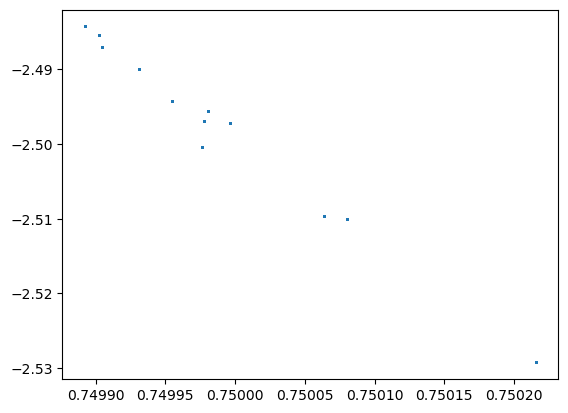

In [26]:
import matplotlib.pyplot as plt

# 2D 히스토그램 생성
plt.scatter(abSpace[0], abSpace[1], s=1)

In [23]:
len(np.unique(abSpace[0]))

19